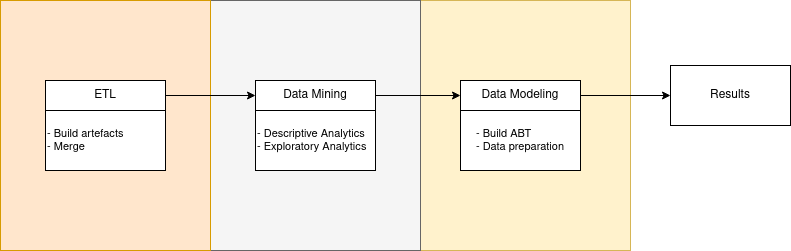

In [33]:
from IPython.display import Image
Image(filename='data_flow.drawio.png')

# 0. Libraries and Loading

## 0.1. Libraries

In [34]:
from utils import *
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
sns.set()

## 0.2. Loading

In [35]:
# saving data transactional
data_transactional = pd.read_parquet('dados/bronze/data_transactional.parquet')

# saving data dimensional
data_dimensional = pd.read_parquet('dados/bronze/data_dimensional.parquet')

# saving data features
data_features = pd.read_parquet('dados/bronze/data_features.parquet')

In [36]:
# merging data_transactional with data_dimensional on id_tracks
data_00 = pd.merge(data_transactional, data_dimensional, on=['id_tracks'], how='left')

# merging data_merge with data_features on id_artist
data_00 = pd.merge(data_00, data_features, on=['id_artist'], how='left')

# checking
data_00.head()

,id_date,user_id,id_tracks,plays,id_artist,id_genre,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,2023-01-01,241,707,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01,241,350,4,78.0,7.0,159.0,640.0,860.0,710.0,2872.0,696.0,1109.0,2122.0,1259.0,129.0
2,2023-01-01,241,964,7,394.0,7.0,37.0,593.0,1153.0,-143.0,768.0,784.0,1510.0,25.0,1563.0,105.0
3,2023-01-01,241,467,12,107.0,1.0,155.0,551.0,789.0,584.0,46.0,828.0,1219.0,1231.0,1140.0,91.0
4,2023-01-01,241,813,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1. Descriptive Data Analysis

In [37]:
# backup
data_01 = data_00.copy()

# checking
data_01.head()

,id_date,user_id,id_tracks,plays,id_artist,id_genre,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,2023-01-01,241,707,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01,241,350,4,78.0,7.0,159.0,640.0,860.0,710.0,2872.0,696.0,1109.0,2122.0,1259.0,129.0
2,2023-01-01,241,964,7,394.0,7.0,37.0,593.0,1153.0,-143.0,768.0,784.0,1510.0,25.0,1563.0,105.0
3,2023-01-01,241,467,12,107.0,1.0,155.0,551.0,789.0,584.0,46.0,828.0,1219.0,1231.0,1140.0,91.0
4,2023-01-01,241,813,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.1. Metadata

In [38]:
# checking some informations
generate_metadata(data_01)

,nome_variavel,tipo,quantidade_nulos,percentual_nulos,cardinalidade
0,id_date,datetime64[ns],0,0.0,365
1,user_id,int64,0,0.0,499
2,id_tracks,int64,0,0.0,999
3,plays,int64,0,0.0,29
4,id_artist,float64,52941,58.3,285
5,id_genre,float64,52941,58.3,7
6,Feature1,float64,52941,58.3,228
7,Feature2,float64,52941,58.3,178
8,Feature3,float64,52941,58.3,224
9,Feature4,float64,52941,58.3,274


## 1.2. Dimension

In [39]:
# checking dimension
print(f'Rows: {data_01.shape[0]}')
print(f'Cols: {data_01.shape[1]}')

Rows: 90812
Cols: 16


## 1.3. Dealing with NaNs and Duplicates

In [40]:
# droping duplicates
data_01 = data_01.drop_duplicates()

# checking
data_01.head()

,id_date,user_id,id_tracks,plays,id_artist,id_genre,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,2023-01-01,241,707,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01,241,350,4,78.0,7.0,159.0,640.0,860.0,710.0,2872.0,696.0,1109.0,2122.0,1259.0,129.0
2,2023-01-01,241,964,7,394.0,7.0,37.0,593.0,1153.0,-143.0,768.0,784.0,1510.0,25.0,1563.0,105.0
3,2023-01-01,241,467,12,107.0,1.0,155.0,551.0,789.0,584.0,46.0,828.0,1219.0,1231.0,1140.0,91.0
4,2023-01-01,241,813,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From Metadata, we can notice that there are columns with nan values and maybe, it can be caused by id_artist column, let's checking...

In [41]:
# checking for nan
data_01[data_01.id_artist.isna()]

,id_date,user_id,id_tracks,plays,id_artist,id_genre,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
0,2023-01-01,241,707,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01,241,813,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023-01-01,243,430,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023-01-01,243,92,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023-01-01,243,528,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90800,2023-12-31,405,352,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90802,2023-12-31,405,766,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90806,2023-12-31,388,310,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90808,2023-12-31,388,168,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's drop this rows for now.

In [42]:
# getting just no nan values
data_01 = data_01.loc[~data_01.id_artist.isna(), :]

# checking
data_01.head()

,id_date,user_id,id_tracks,plays,id_artist,id_genre,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
1,2023-01-01,241,350,4,78.0,7.0,159.0,640.0,860.0,710.0,2872.0,696.0,1109.0,2122.0,1259.0,129.0
2,2023-01-01,241,964,7,394.0,7.0,37.0,593.0,1153.0,-143.0,768.0,784.0,1510.0,25.0,1563.0,105.0
3,2023-01-01,241,467,12,107.0,1.0,155.0,551.0,789.0,584.0,46.0,828.0,1219.0,1231.0,1140.0,91.0
6,2023-01-01,243,327,22,110.0,4.0,257.0,455.0,840.0,388.0,687.0,-173.0,1697.0,2255.0,1448.0,102.0
7,2023-01-01,243,852,18,186.0,1.0,146.0,579.0,1109.0,3267.0,351.0,1314.0,565.0,1451.0,1125.0,99.0


In [43]:
# checking some informations
generate_metadata(data_01)

,nome_variavel,tipo,quantidade_nulos,percentual_nulos,cardinalidade
0,id_date,datetime64[ns],0,0.0,365
1,user_id,int64,0,0.0,499
2,id_tracks,int64,0,0.0,415
3,plays,int64,0,0.0,29
4,id_artist,float64,0,0.0,285
5,id_genre,float64,0,0.0,7
6,Feature1,float64,0,0.0,228
7,Feature2,float64,0,0.0,178
8,Feature3,float64,0,0.0,224
9,Feature4,float64,0,0.0,274


## 1.4. Transformations

From Metadata we can notice that there are some columns that are not in the right format. It is necessary to change.

In [44]:
# changing formats
# id_tracks
data_01.id_tracks = data_01.id_tracks.astype(int).astype(str)

# id_genre
data_01.id_genre = data_01.id_genre.astype(int).astype(str)

# user_id
data_01.user_id = data_01.user_id.astype(int).astype(str)

# id_artist
data_01.id_artist = data_01.id_artist.astype(int).astype(str)

# id_plays
data_01.plays = data_01.plays.astype(int)

In [45]:
# checking some informations
generate_metadata(data_01)

,nome_variavel,tipo,quantidade_nulos,percentual_nulos,cardinalidade
0,id_date,datetime64[ns],0,0.0,365
1,plays,int64,0,0.0,29
2,Feature1,float64,0,0.0,228
3,Feature2,float64,0,0.0,178
4,Feature3,float64,0,0.0,224
5,Feature4,float64,0,0.0,274
6,Feature5,float64,0,0.0,270
7,Feature6,float64,0,0.0,264
8,Feature7,float64,0,0.0,268
9,Feature8,float64,0,0.0,275


## 1.5. Descriptive Statistics

In [46]:
# sorting out columns numerical and categorical
# numerical
numerical_columns = data_01.select_dtypes(include=['int64', 'float64']).columns

# categorical
categorical_columns = data_01.select_dtypes(include=['object']).columns

### 1.5.1. Categorical

In [47]:
# creating data_categorical
data_categorical = data_01[categorical_columns]

# checking
data_categorical.head()

,user_id,id_tracks,id_artist,id_genre
1,241,350,78,7
2,241,964,394,7
3,241,467,107,1
6,243,327,110,4
7,243,852,186,1


In [48]:
# describe
data_categorical.describe()

,user_id,id_tracks,id_artist,id_genre
count,37868,37868,37868,37868
unique,499,415,285,7
top,232,143,263,7
freq,123,117,211,6552


### 1.5.2. Numerical

In [49]:
# creating data_numerical
data_numerical = data_01[numerical_columns]

# checking
data_numerical.head()

,plays,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
1,4,159.0,640.0,860.0,710.0,2872.0,696.0,1109.0,2122.0,1259.0,129.0
2,7,37.0,593.0,1153.0,-143.0,768.0,784.0,1510.0,25.0,1563.0,105.0
3,12,155.0,551.0,789.0,584.0,46.0,828.0,1219.0,1231.0,1140.0,91.0
6,22,257.0,455.0,840.0,388.0,687.0,-173.0,1697.0,2255.0,1448.0,102.0
7,18,146.0,579.0,1109.0,3267.0,351.0,1314.0,565.0,1451.0,1125.0,99.0


In [50]:
# describe
data_numerical.describe()

,plays,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
count,37868.000000,37868.000000,37868.000000,37868.000000,37868.000000,37868.000000,37868.000000,37868.000000,37868.000000,37868.000000,37868.000000
mean,14.990308,223.088518,597.290720,871.716674,1105.281002,875.279127,531.429941,894.087409,1050.057040,1289.275008,107.565306
std,8.371292,168.367747,77.975675,146.469248,1037.090997,751.997323,469.888395,710.816577,988.913783,164.282412,48.407006
min,1.000000,-246.000000,402.000000,352.000000,-2156.000000,-1242.000000,-706.000000,-959.000000,-1705.000000,837.000000,-8.000000
25%,8.000000,125.000000,546.000000,766.000000,388.000000,346.000000,178.000000,381.000000,415.000000,1180.000000,72.000000
50%,15.000000,218.000000,594.000000,873.000000,1093.000000,881.000000,543.000000,836.000000,1071.000000,1298.000000,111.000000
75%,22.000000,330.000000,652.000000,978.000000,1701.000000,1340.000000,890.000000,1335.000000,1744.000000,1399.000000,144.000000
max,29.000000,778.000000,842.000000,1228.000000,4348.000000,3389.000000,1828.000000,3390.000000,3989.000000,1675.000000,231.000000


# 2. Exploratory Data Analysis

In [51]:
# backup
data_02 = data_01.copy()

# checking
data_02.head()

,id_date,user_id,id_tracks,plays,id_artist,id_genre,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9,Feature10
1,2023-01-01,241,350,4,78,7,159.0,640.0,860.0,710.0,2872.0,696.0,1109.0,2122.0,1259.0,129.0
2,2023-01-01,241,964,7,394,7,37.0,593.0,1153.0,-143.0,768.0,784.0,1510.0,25.0,1563.0,105.0
3,2023-01-01,241,467,12,107,1,155.0,551.0,789.0,584.0,46.0,828.0,1219.0,1231.0,1140.0,91.0
6,2023-01-01,243,327,22,110,4,257.0,455.0,840.0,388.0,687.0,-173.0,1697.0,2255.0,1448.0,102.0
7,2023-01-01,243,852,18,186,1,146.0,579.0,1109.0,3267.0,351.0,1314.0,565.0,1451.0,1125.0,99.0


## 2.1. Univariate Analysis

### 2.1.1. Categorical Columns

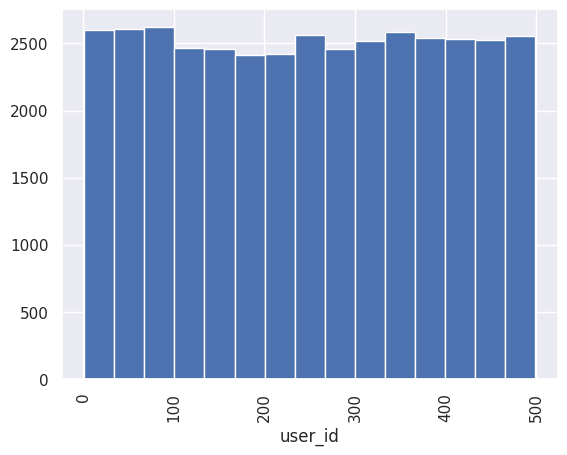

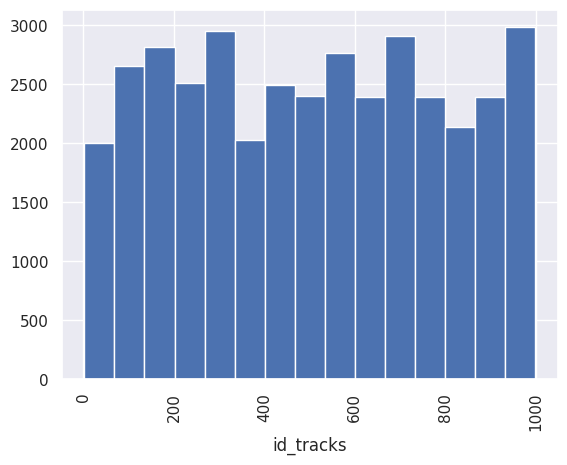

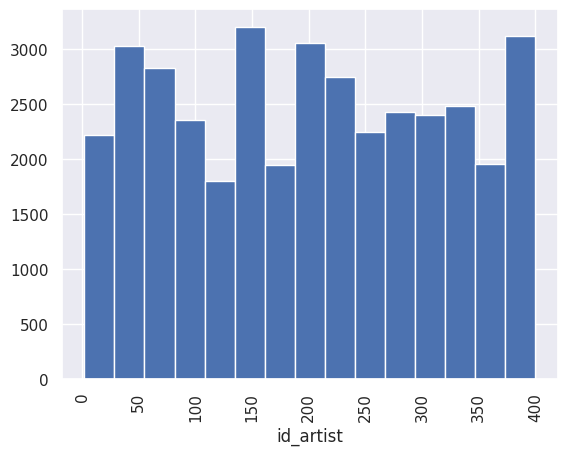

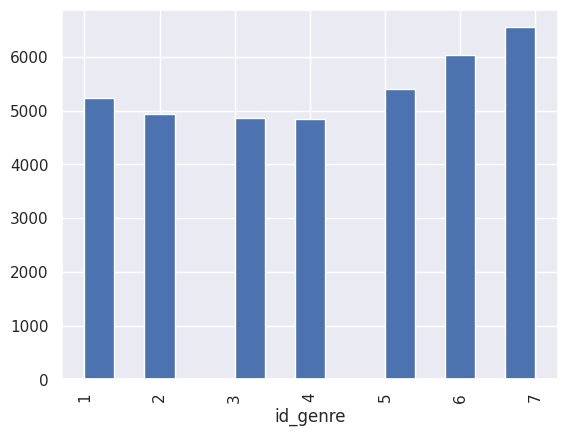

In [52]:
# categorical columns analyse
for column in categorical_columns:
    plt.figure()
    data_02[column].astype(int).hist(bins=15)
    plt.xlabel(column)
    plt.xticks(rotation=90)
    plt.show()

### 2.1.2. Numerical Columns

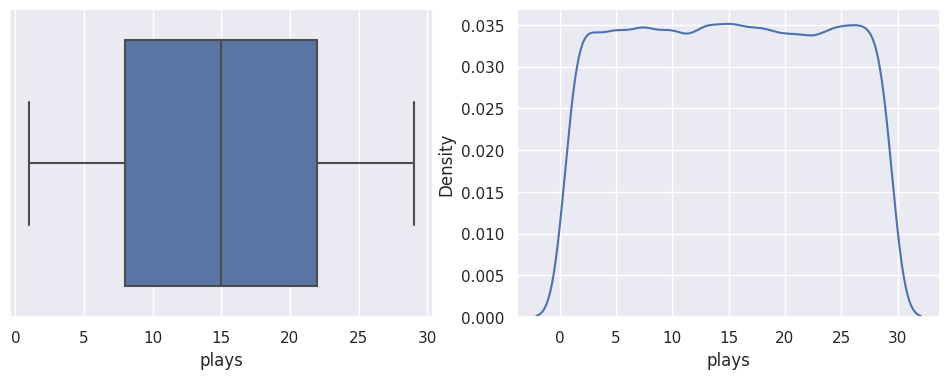

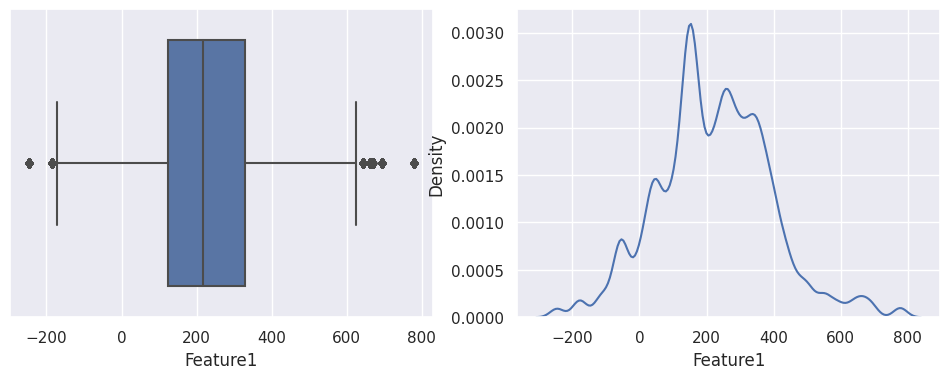

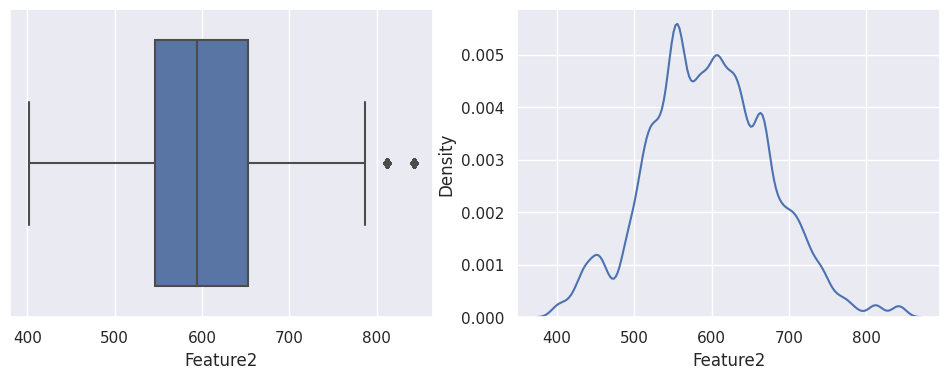

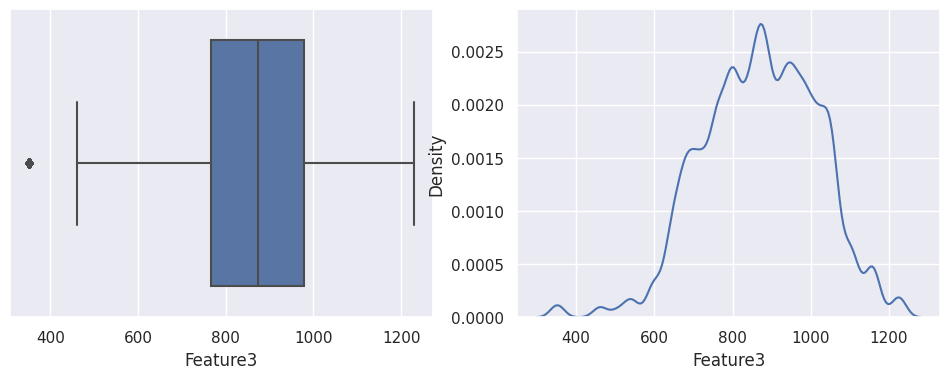

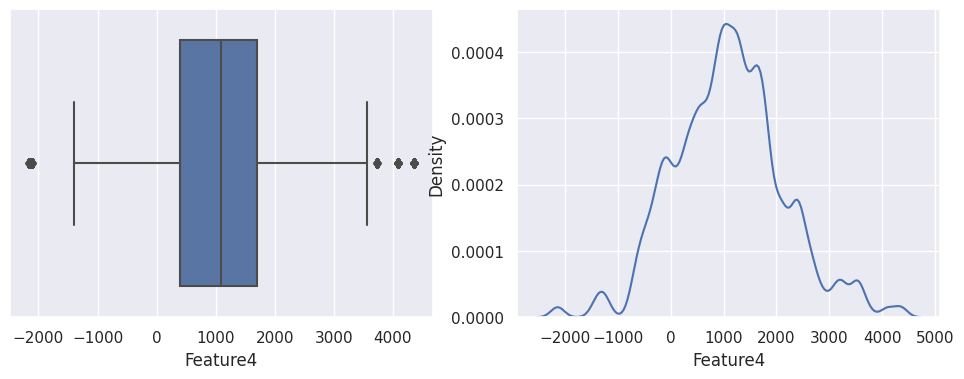

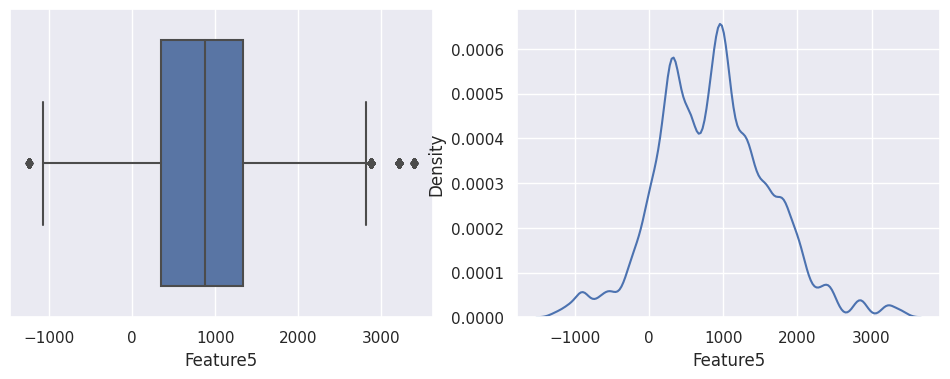

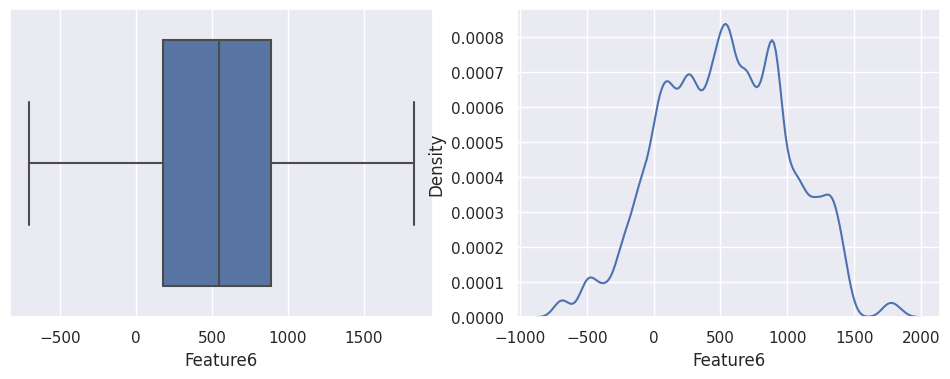

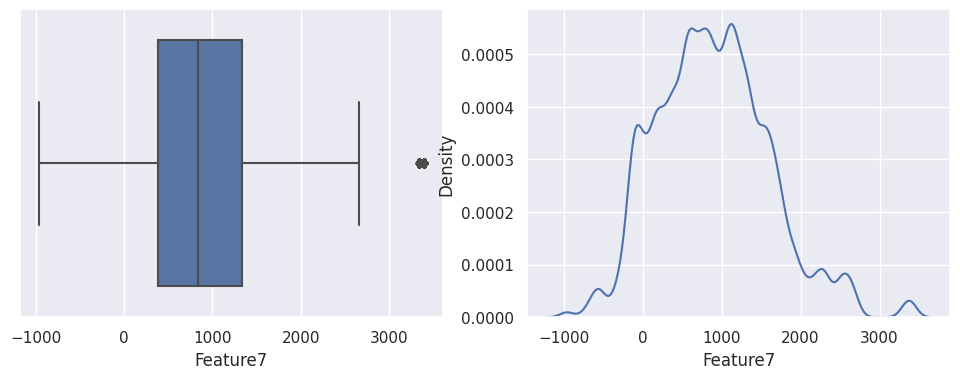

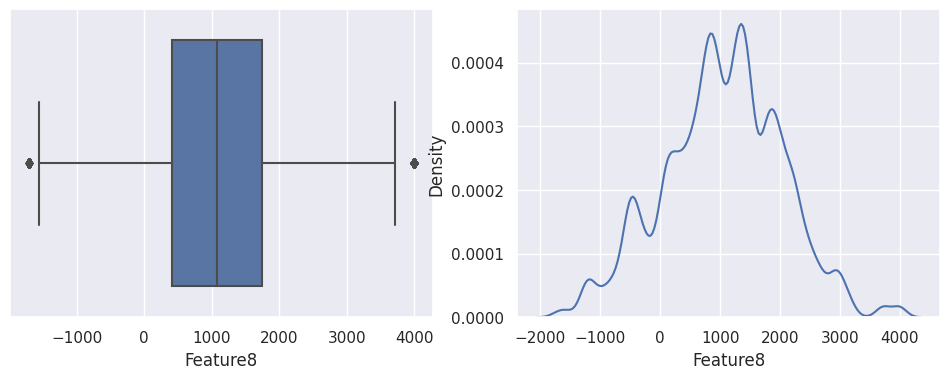

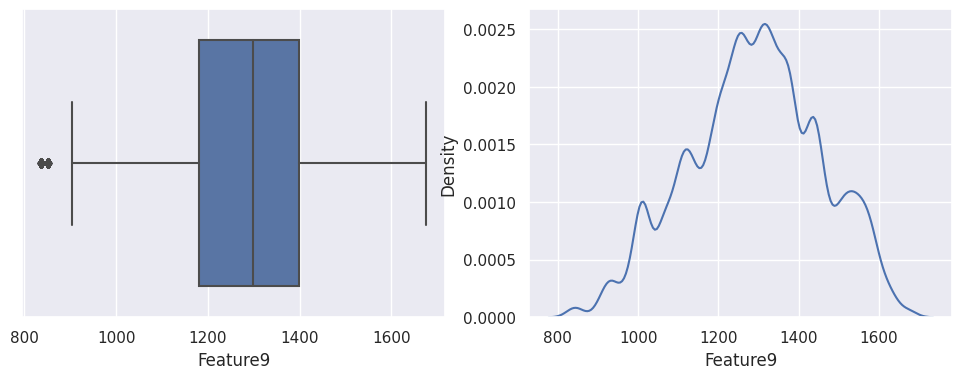

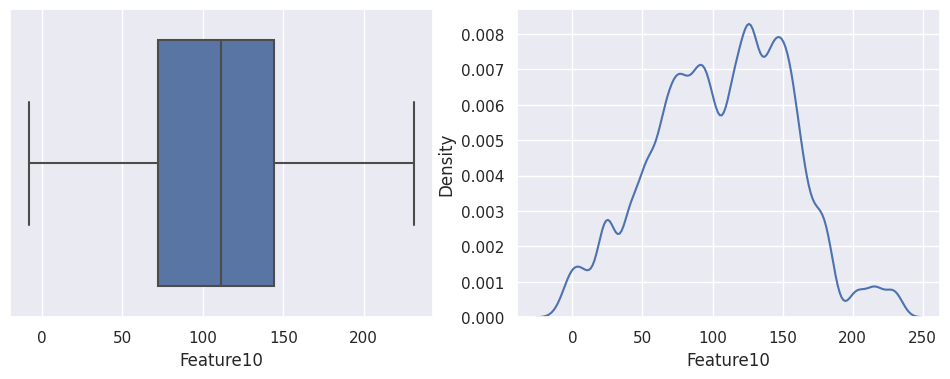

In [53]:
# numerical columns analyse
for column in numerical_columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.boxplot(
        data=data_02,
        x=column
    )

    plt.subplot(1, 2, 2)
    sns.kdeplot(
        data=data_02,
        x=column
    )
    plt.show()

## 2.2. Bivariate Analysis

In [54]:
#

## 2.3. Multivariate Analysis

<Axes: >

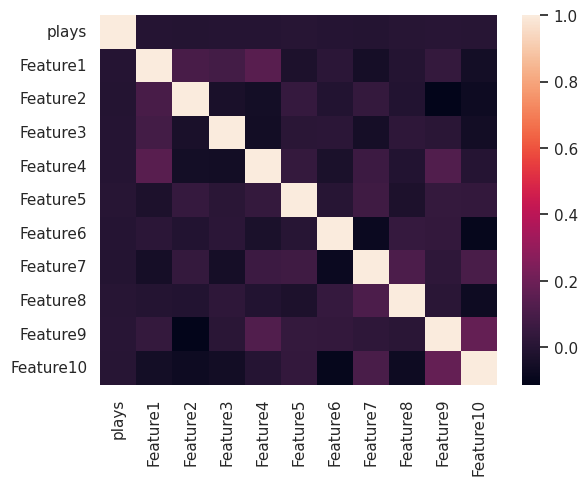

In [55]:
# plotting heatmap
sns.heatmap(data_numerical.corr())

## 2.4. Saving Silver

In [56]:
# saving data_transactional_preprocessed
data_transactional_preprocessed = data_01[data_transactional.columns].drop_duplicates().reset_index(drop=True)

data_transactional_preprocessed.to_parquet('dados/silver/data_transactional.parquet')

# saving data_dimensional_preprocessed
data_dimensional_preprocessed = data_01[data_dimensional.columns].drop_duplicates().reset_index(drop=True)

data_dimensional_preprocessed.to_parquet('dados/silver/data_dimensional.parquet')

# saving data_features_preprocessed
data_features_preprocessed = data_01[data_features.columns].drop_duplicates().reset_index(drop=True)

data_features_preprocessed.reset_index(drop=True).to_parquet('dados/silver/data_features.parquet')

In [57]:
# saving data_merge_preprocessed
data_merge_preprocessed = data_01.copy()

data_merge_preprocessed.to_parquet('dados/silver/data_merge.parquet')